<a href="https://colab.research.google.com/github/izabelabe/CTR-prediction/blob/main/CTR_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy
!pip install pandas

You should consider upgrading via the 'C:\Users\izkab\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\izkab\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [ ]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\izkab\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [ ]:
import numpy as np 
import pandas as pd
import gzip
import random
import matplotlib

###### Reading train data, extracting a sample of size equal 1000000

In [ ]:
n = 40428967
sample_size = 1000000
skip_values = sorted(random.sample(range(1,n), n-sample_size))

with gzip.open('avazu-ctr-prediction/train.gz') as f:
    train = pd.read_csv(f,skiprows = skip_values)

In [ ]:
train.head(15)

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10006490708516192015,1,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15708,320,50,1722,0,35,100083,79
1,10006789981076459409,0,14102100,1005,0,030440fe,08ba7db9,76b2941d,ecad2386,7801e8d9,...,1,0,20596,320,50,2161,0,35,-1,157
2,10016873305752157334,0,14102100,1010,1,85f751fd,c4e18dd6,50e219e0,ffc6ffd0,7801e8d9,...,4,0,21665,320,50,2493,3,35,100050,117
3,10018930650935227325,0,14102100,1005,1,5ee41ff2,17d996e6,f028772b,ecad2386,7801e8d9,...,1,0,20596,320,50,2161,0,35,-1,157
4,10020838610941394934,0,14102100,1005,1,43d6df75,27e3c518,28905ebd,ecad2386,7801e8d9,...,1,0,15708,320,50,1722,0,35,100084,79
5,10032235721168274495,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15708,320,50,1722,0,35,100084,79
6,10040214148118137106,1,14102100,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,1,0,15708,320,50,1722,0,35,-1,79
7,10043486339266486052,0,14102100,1005,1,fd309fe8,f436b08f,72722551,ecad2386,7801e8d9,...,1,2,18993,320,50,2161,0,35,-1,157
8,10049979360421715317,0,14102100,1005,0,3e183f99,14878e20,f028772b,ecad2386,7801e8d9,...,1,0,20596,320,50,2161,0,35,-1,157
9,10052059252101482181,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15703,320,50,1722,0,35,100083,79


### Preparing data for time related analysis

In [ ]:
dateinfo = train[["click", "hour"]]
dateinfo.head()

,click,hour
0,1,14102100
1,0,14102100
2,0,14102100
3,0,14102100
4,0,14102100


In [ ]:
dateinfo.dtypes

click    int64
hour     int64
dtype: object

In [ ]:
dateinfo = dateinfo.astype({'hour' : 'string'})

In [ ]:
dateinfo["year"] = dateinfo['hour'].values
dateinfo["month"] = dateinfo['hour'].values
dateinfo["day"] = dateinfo['hour'].values

In [ ]:
dateinfo.dtypes

click     int64
hour     string
year     string
month    string
day      string
dtype: object

In [ ]:
dateinfo["hour"] = dateinfo["hour"].str.slice(6,8)
dateinfo["year"] = dateinfo["year"].str.slice(0,2)
dateinfo["month"] = dateinfo["month"].str.slice(2,4)
dateinfo["day"] = dateinfo["day"].str.slice(4,6)

In [ ]:
dateinfo.head(10)

,click,hour,year,month,day
0,1,00,14,10,21
1,0,00,14,10,21
2,0,00,14,10,21
3,0,00,14,10,21
4,0,00,14,10,21
5,0,00,14,10,21
6,1,00,14,10,21
7,0,00,14,10,21
8,0,00,14,10,21
9,0,00,14,10,21


In [ ]:
dateinfo.tail(10)

,click,hour,year,month,day
999990,0,23,14,10,30
999991,0,23,14,10,30
999992,0,23,14,10,30
999993,0,23,14,10,30
999994,0,23,14,10,30
999995,0,23,14,10,30
999996,0,23,14,10,30
999997,0,23,14,10,30
999998,0,23,14,10,30
999999,0,23,14,10,30


#### Distinction of hours when users clicked on a displayed add

In [ ]:
hours = dateinfo[["click", "hour"]].loc[dateinfo.click == 1]
hours.head()

,click,hour
0,1,00
6,1,00
11,1,00
20,1,00
24,1,00


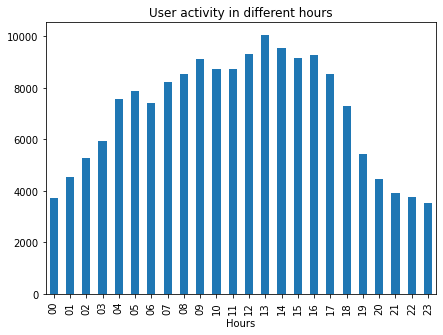

In [ ]:
from matplotlib import pyplot as plt

fig,ax = plt.subplots(figsize=(7,5))
plt.title('User activity in different hours')
plt.xlabel('Hours')

hourly_activity = hours['hour'].value_counts()
hourly_activity = pd.DataFrame(hourly_activity).sort_index()


hourly_activity['hour'].plot(kind='bar', legend = False)

plt.show()

###### Hours between 4 a.m. and 6 p.m where the most active once, when the most adds were displayed. This activity reachs its peak at 1 p.m

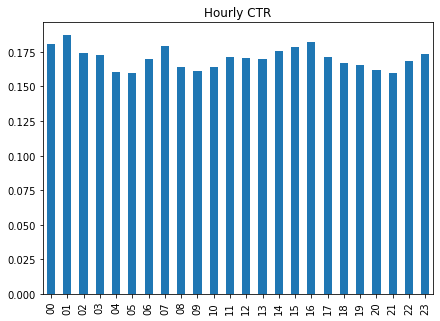

In [ ]:
fig,ax = plt.subplots(figsize=(7,5))
plt.title('Hourly CTR')

hours_ctr = hours['hour'].value_counts() / dateinfo["hour"].value_counts()

hours_ctr.plot(kind= 'bar')
plt.show()

###### Even tough most adds were diplayed at 1 p.m, this wasn't the time where CTR was the highest. Suprisingly,  users clicked on a displayed to them add most frequently at 1 a.m

### Weekday activity and CTR overview
##### Prepering the data

In [ ]:
dateinfo = dateinfo.astype({'day' : 'str'})
dateinfo["year"] = "20" + dateinfo["year"]
dateinfo["date"] = pd.to_datetime(dateinfo["year"] + "-" + dateinfo["month"] + "-" + dateinfo["day"])
dateinfo["weekday"] = dateinfo["date"].dt.day_name()
dateinfo.head()

,click,hour,year,month,day,date,weekday
0,1,00,2014,10,21,2014-10-21,Tuesday
1,0,00,2014,10,21,2014-10-21,Tuesday
2,0,00,2014,10,21,2014-10-21,Tuesday
3,0,00,2014,10,21,2014-10-21,Tuesday
4,0,00,2014,10,21,2014-10-21,Tuesday


In [ ]:
dateinfo.head(1000000)

,click,hour,year,month,day,date,weekday
0,1,00,2014,10,21,2014-10-21,Tuesday
1,0,00,2014,10,21,2014-10-21,Tuesday
2,0,00,2014,10,21,2014-10-21,Tuesday
3,0,00,2014,10,21,2014-10-21,Tuesday
4,0,00,2014,10,21,2014-10-21,Tuesday
...,...,...,...,...,...,...,...
999995,0,23,2014,10,30,2014-10-30,Thursday
999996,0,23,2014,10,30,2014-10-30,Thursday
999997,0,23,2014,10,30,2014-10-30,Thursday
999998,0,23,2014,10,30,2014-10-30,Thursday


##### Limiting the data only to 7 days intead of 9 to give a more accurate comparison of weekdays (we do not risk stabilizing the ctr more for weekdays that would occur twice)

In [ ]:
dateinfo = dateinfo.astype({'day' : 'int32'})
weekdays = dateinfo[["click", "weekday", "day"]].loc[dateinfo.day <= 27]
weekdays.tail(15)

,click,weekday,day
669494,0,Monday,27
669495,1,Monday,27
669496,0,Monday,27
669497,0,Monday,27
669498,0,Monday,27
669499,1,Monday,27
669500,0,Monday,27
669501,0,Monday,27
669502,0,Monday,27
669503,0,Monday,27


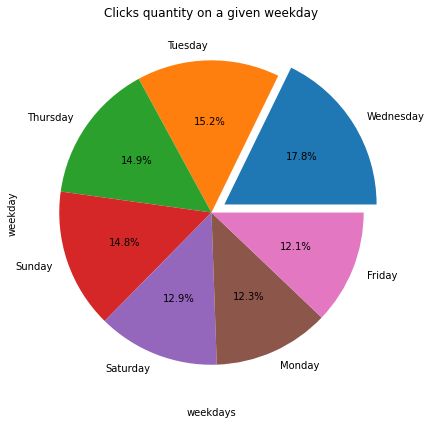

In [ ]:
fig,ax = plt.subplots(figsize=(7,7))
plt.title('Clicks quantity on a given weekday')
plt.xlabel('weekdays')
weekdays['weekday'].loc[weekdays.click == 1].value_counts().plot(kind='pie', autopct='%1.1f%%', explode = (0.1,0,0,0,0,0,0))

plt.show()

##### Biggest user activity was recorded on Wednesdays, most adds were displayed on that day

In [ ]:
active_weekdays = weekdays.loc[weekdays["click"] == 1]

In [ ]:
weekdays_ctr = active_weekdays["weekday"].value_counts() / weekdays['weekday'].value_counts()
print(weekdays_ctr)

Friday       0.172628
Monday       0.181525
Saturday     0.183256
Sunday       0.182307
Thursday     0.181506
Tuesday      0.173542
Wednesday    0.157706
Name: weekday, dtype: float64


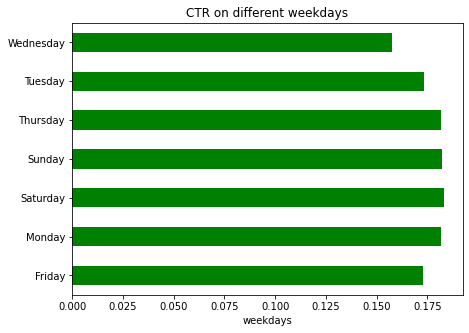

In [ ]:
fig,ax = plt.subplots(figsize=(7,5))
plt.title('CTR on different weekdays')
plt.xlabel('weekdays')
#weekdays_ctr.plot(kind='pie',legend = False,autopct='%1.1f%%', labeldistance = 1.05, startangle=90, explode = (0,0,0,0.1,0,0,0))
weekdays_ctr.plot(kind='barh', color = 'g')
plt.show()

######  Sundays and Thursdays were the days that had the highest CTR, adds were clicked on with the biggest frequency then

### Provided device information

In [ ]:
train[["device_id", "device_ip", "device_model"]].describe()

,device_id,device_ip,device_model
count,1000000,1000000,1000000
unique,150641,555870,5152
top,a99f214a,6b9769f2,8a4875bd
freq,824881,5160,60784


In [ ]:
train["device_type"].value_counts()

1    922689
0     55051
4     19144
5      3116
Name: device_type, dtype: int64

In [ ]:
train["device_conn_type"].value_counts()

0    863330
2     81862
3     53741
5      1067
Name: device_conn_type, dtype: int64

### Provided site information

In [ ]:
len(train["site_id"].unique())

2652

In [ ]:
train["site_category"].value_counts().head()

50e219e0    409323
f028772b    312782
28905ebd    182448
3e814130     75555
f66779e6      6133
Name: site_category, dtype: int64

In [ ]:
train["site_domain"].value_counts().head()

c4e18dd6    374609
f3845767    160345
7e091613     82087
7687a86e     32009
98572c79     24539
Name: site_domain, dtype: int64

### Banner position overview

In [ ]:
train["banner_pos"].value_counts()

0    720442
1    277769
7      1095
2       316
4       179
5       145
3        54
Name: banner_pos, dtype: int64

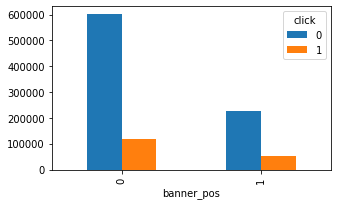

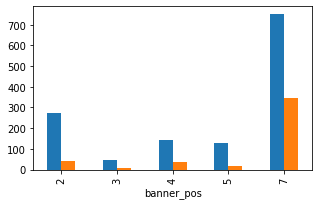

In [ ]:
train.groupby(['banner_pos','click']).size().unstack().iloc[0:2:].plot(kind='bar', figsize = (5,3))
train.groupby(['banner_pos','click']).size().unstack().iloc[2:,:].plot(kind='bar', legend = False, figsize = (5,3))

plt.show()

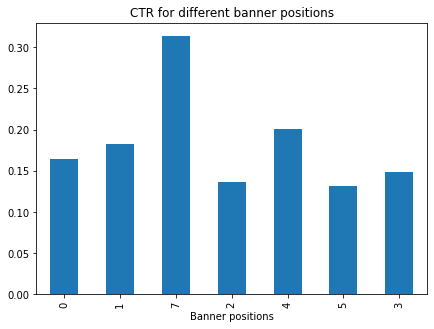

In [ ]:
fig,ax = plt.subplots(figsize=(7,5))
plt.title('CTR for different banner positions')
plt.xlabel('Banner positions')
bannerPosition = train["banner_pos"].loc[train.click == 1].value_counts()/train["banner_pos"].value_counts()
#bannerPosition = pd.DataFrame(bannerPosition)
bannerPosition.plot(kind = "bar", legend = False)

plt.show()

### Provided app information

In [ ]:
train[["app_id", "app_domain", "app_category"]].describe()

,app_id,app_domain,app_category
count,1000000,1000000,1000000
unique,3114,205,25
top,ecad2386,7801e8d9,07d7df22
freq,638781,673418,647054


TODO:
    - wybranie odpowiednich parametrów do predykcji
    - predykcja wspołczynnika CTR klasyfikacją oraz metodą alteratywną 

### Choosing adequate parameters for prediction 


In [ ]:
pip install seaborn

You should consider upgrading via the 'C:\Users\izkab\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [ ]:
import seaborn as sns

In [ ]:
print(train.dtypes)

id                  uint64
click                int64
hour                 int64
C1                   int64
banner_pos           int64
site_id             object
site_domain         object
site_category       object
app_id              object
app_domain          object
app_category        object
device_id           object
device_ip           object
device_model        object
device_type          int64
device_conn_type     int64
C14                  int64
C15                  int64
C16                  int64
C17                  int64
C18                  int64
C19                  int64
C20                  int64
C21                  int64
dtype: object


In [ ]:
objecSt_cols = train.select_dtypes(['object']).columns.tolist()

for col in object_cols:
	train[col] = train[col].apply(lambda x: hash(x))

<AxesSubplot:>

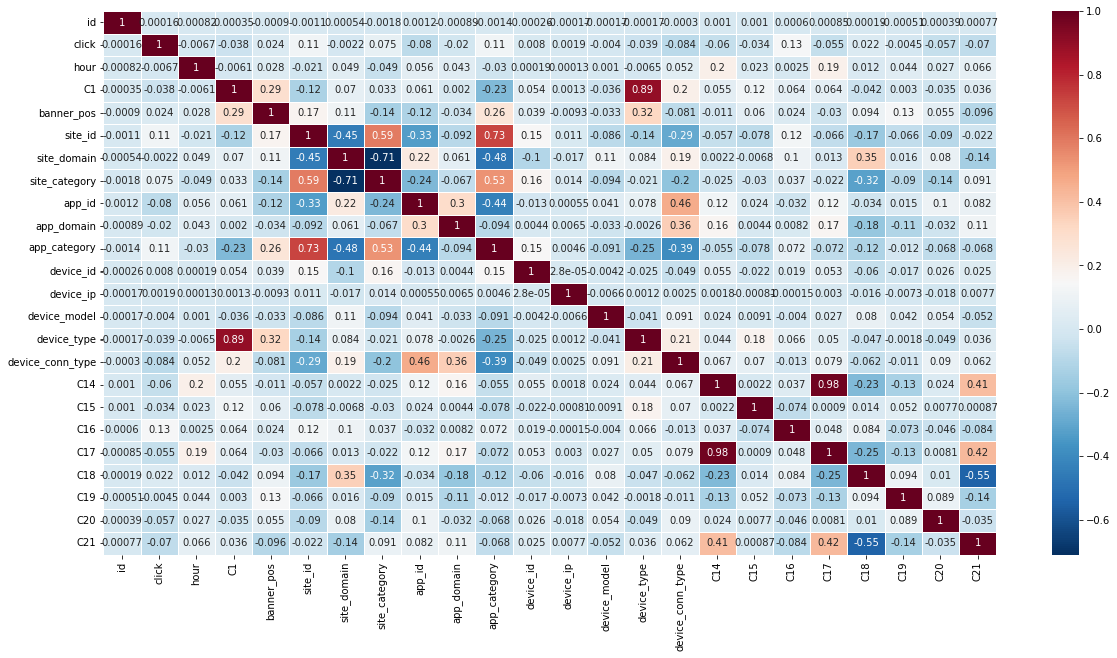

In [ ]:
ad_corr = train.corr(method = 'pearson')
fig,ax = plt.subplots(figsize = (20,10))
sns.heatmap(ad_corr,
            xticklabels=ad_corr.columns,
            yticklabels=ad_corr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=1,ax=ax)

In [ ]:
train.drop('id',axis=1,inplace = True)

In [ ]:
print(ad_corr["click"].sort_values())

device_conn_type   -0.083826
app_id             -0.080338
C21                -0.070487
C14                -0.059959
C20                -0.057056
C17                -0.055152
device_type        -0.038616
C1                 -0.037694
C15                -0.033587
app_domain         -0.020277
hour               -0.006650
C19                -0.004466
device_model       -0.004028
site_domain        -0.002207
id                  0.000158
device_ip           0.001897
device_id           0.008015
C18                 0.022405
banner_pos          0.024339
site_category       0.075278
app_category        0.113101
site_id             0.114803
C16                 0.132341
click               1.000000
Name: click, dtype: float64


In [ ]:
train.head()

,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1,14102100,1005,0,4903021426274673285,-6563657963669671367,7195408322014615165,-3710537977158244136,1226856958240999760,4456439746858628418,...,1,0,15708,320,50,1722,0,35,100083,79
1,0,14102100,1005,0,-9078639210540744623,-2929158370579911864,249964660591871596,-3710537977158244136,1226856958240999760,4456439746858628418,...,1,0,20596,320,50,2161,0,35,-1,157
2,0,14102100,1010,1,-6991772501764576957,5741745851489887561,-945735667369591540,3041274830892208171,1226856958240999760,-5760839954993405901,...,4,0,21665,320,50,2493,3,35,100050,117
3,0,14102100,1005,1,5643966613768181588,-8884029468868670760,372734551264820478,-3710537977158244136,1226856958240999760,4456439746858628418,...,1,0,20596,320,50,2161,0,35,-1,157
4,0,14102100,1005,1,-3345263479288811201,-5718340751812994253,7195408322014615165,-3710537977158244136,1226856958240999760,4456439746858628418,...,1,0,15708,320,50,1722,0,35,100084,79


In [ ]:
x = train.drop(['device_model','device_ip','hour', 'C19', 'click'],axis=1)
y = train.click

In [ ]:
!pip install sklearn

You should consider upgrading via the 'C:\Users\izkab\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=17)

### Choosing an estimator by comparing logarithmic loss of different models 

In [ ]:
pip install catboost

You should consider upgrading via the 'C:\Users\izkab\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


### Prediction using CatBoostClassifier

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
cat_boost= CatBoostClassifier(learning_rate=0.05, loss_function='Logloss', 
                             random_state=111, iterations=100, eval_metric="Logloss")
# logloss because the target has only two different values

In [ ]:
x_test.columns

Index(['C1', 'banner_pos', 'site_id', 'site_domain', 'site_category', 'app_id',
       'app_domain', 'app_category', 'device_id', 'device_type',
       'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C20', 'C21'],
      dtype='object')

In [ ]:
cat_boost.fit(x_train, y_train, eval_set=(x_test, y_test), cat_features= ['C1', 'banner_pos', 'site_id', 
        'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category', 'device_id', 'device_type',
        'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C20', 'C21'], plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6701611	test: 0.6701594	best: 0.6701594 (0)	total: 503ms	remaining: 49.8s
1:	learn: 0.6493951	test: 0.6493954	best: 0.6493954 (1)	total: 830ms	remaining: 40.7s
2:	learn: 0.6300956	test: 0.6300469	best: 0.6300469 (2)	total: 1.2s	remaining: 38.9s
3:	learn: 0.6127057	test: 0.6126918	best: 0.6126918 (3)	total: 1.57s	remaining: 37.7s
4:	learn: 0.5967660	test: 0.5967692	best: 0.5967692 (4)	total: 1.9s	remaining: 36.1s
5:	learn: 0.5821447	test: 0.5821794	best: 0.5821794 (5)	total: 2.19s	remaining: 34.3s
6:	learn: 0.5687900	test: 0.5688336	best: 0.5688336 (6)	total: 2.49s	remaining: 33.1s
7:	learn: 0.5565824	test: 0.5566976	best: 0.5566976 (7)	total: 2.8s	remaining: 32.2s
8:	learn: 0.5453639	test: 0.5454982	best: 0.5454982 (8)	total: 3.11s	remaining: 31.4s
9:	learn: 0.5350997	test: 0.5352212	best: 0.5352212 (9)	total: 3.43s	remaining: 30.8s
10:	learn: 0.5256223	test: 0.5257015	best: 0.5257015 (10)	total: 3.71s	remaining: 30s
11:	learn: 0.5169488	test: 0.5170255	best: 0.5170255 (11)

In [ ]:
predictions= cat_boost.predict(x_test, prediction_type="Class", ntree_start=0, ntree_end= cat_boost.get_best_iteration(),
                               thread_count=-1, verbose=None)

In [ ]:
feature_importance = cat_boost.get_feature_importance(prettified=True).sort_index(ascending=True)
feature_importance

,Feature Id,Importances
0,site_id,34.363039
1,app_id,28.410742
2,C17,9.880246
3,C14,8.660453
4,site_domain,6.543559
5,C21,2.514726
6,app_category,1.700693
7,app_domain,1.634140
8,device_conn_type,1.377074
9,banner_pos,0.999113


In [ ]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test,predictions)
print(matrix)

[[164145   1850]
 [ 31330   2675]]


In [ ]:
tn, fp, fn, tp = matrix.ravel()
(tn, fp, fn, tp)

(164145, 1850, 31330, 2675)

In [ ]:
from sklearn.metrics import precision_score,recall_score

precision = precision_score(y_test, predictions, average = 'weighted')
print("Precision: %s" %(precision))
recall = recall_score(y_test, predictions, average = 'weighted')
print("Recall: %s" %(recall))

Precision: 0.7974617358481499
Recall: 0.8341


In [ ]:
from sklearn.metrics import log_loss

loss = log_loss(y_test, predictions)
loss

5.729990400191911

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 10, random_state = 111)
tree.fit(x_train,y_train)
tree_predictions = tree.predict(x_test)
tree_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
matrix2 = confusion_matrix(y_test,tree_predictions)
print(matrix2)

[[164244   1751]
 [ 31541   2464]]


In [ ]:
tn, fp, fn, tp = matrix2.ravel()
(tn, fp, fn, tp)

(164244, 1751, 31541, 2464)

In [ ]:
precision = precision_score(y_test, tree_predictions, average = 'weighted')
print("Precision: %s" %(precision))
recall = recall_score(y_test, tree_predictions, average = 'weighted')
print("Recall: %s" %(recall))

Precision: 0.7956588976796302
Recall: 0.83354


In [ ]:
from sklearn.metrics import log_loss

loss = log_loss(y_test, tree_predictions)
loss

5.749331719172333